In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
## read file
df = pd.read_csv('height-weight.csv')

In [47]:
df.head()


,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [49]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [50]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

<AxesSubplot: xlabel='Height', ylabel='Weight'>

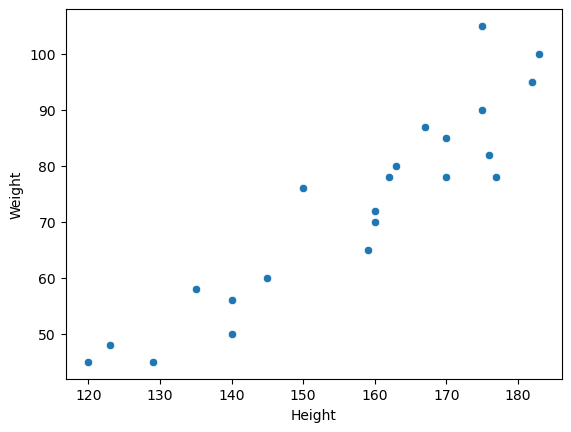

In [51]:
sns.scatterplot(x=df['Height'],y=df['Weight'])

In [52]:
x = df[['Weight']]
y =df['Height']

In [53]:
## spliting the data set into a train test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)


In [54]:
## scalling the independent variable
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [55]:
x_train = scaler.fit_transform(x_train)
x_train.shape

(18, 1)

In [56]:
x_test = scaler.transform(x_test)

In [57]:
x_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

In [58]:
## fit the model now
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train_scaled,y_train)

LinearRegression()

In [59]:
reg.coef_

array([17.03440872])

In [60]:
reg.intercept_

157.5

In [61]:
y_pred = reg.predict(x_test_scaled)
y_pred

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [62]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

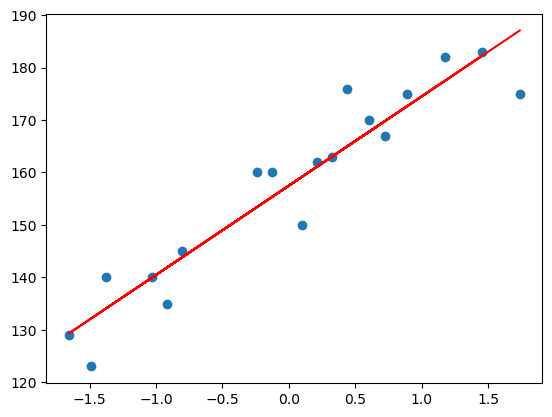

In [65]:
plt.scatter(x_train,y_train)
plt.plot(x_train,reg.predict(x_train),'r')

In [66]:
## performance metric using MAE,MSE,RMSE

In [74]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import math
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse=math.sqrt(mean_squared_error(y_test,y_pred))

In [75]:
print(mse,mae,rmse)

109.77592599051664 9.822657814519232 10.477400726827081


In [76]:
## accuracy of a model 
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)




In [77]:
score

0.776986986042344

In [78]:
adjusted_r2_score = 1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
adjusted_r2_score

0.7026493147231252